In [1]:
### ----------------------------------------------------------------------------------
# -- Company: University of Stuttgart (IIS)
# -- Engineer: Yichao Peng
# -- 
# -- Description:
# -- This GUI is for IIS pNMR device use only. All rights reserved.
# ----------------------------------------------------------------------------------
import src.main as main

In [10]:
# for i in range(30):
#     print(main.
for entry in main.all_of_the_parameters.fpga_func_dict :
    print(entry)
    print( main.fpga_tracing_func.osci.read(main.all_of_the_parameters.fpga_func_dict[entry]))

C_ENABLE_CMD
0
C_SINGLE_SHOT_CMD
0
C_SELECT_ANALOG_TRIGGER_CHANNEL_CMD
0
C_SET_ANALOG_TRIGGER_RISING_EDGE_CMD
0
C_SET_ANALOG_TRIGGER_FALLING_EDGE_CMD
0
C_BIN_CH_RE_TRIG_EN_CMD
1
C_BIN_CH_FE_TRIG_EN_CMD
0
C_ARM_CMD
0
C_SET_NR_SAMPLES_CMD
2000
C_CLOCK_STEP_SIZE_CMD
100
C_SET_TRIGGER_DELAY_CMD
4292870144
C_SELECT_READ_MEMORY_CMD
0
C_SET_CURRENT_READ_ADDRESS_CMD
0
C_READ_DATA
0
C_GET_NR_ANALOG_CHANNELS_CMD
2
C_GET_NR_DIGITAL_CHANNELS_CMD
32
C_GET_NR_ANALOG_MEMORIES_CMD
2
C_GET_NR_DIGITAL_MEMORIES_CMD
1
C_GET_MEMORY_DEPTH_CMD
26
C_READ_BUSY_SIGNAL_CMD
0
C_READ_READY_SIGNAL_CMD
0
C_TOGGLE_LED_CMD
0
C_SET_ANALOG_TRIGGER_THRESHOLD_CMD
0
C_CTRL_MUX_SELECT_ANALOG_MEMORY_CMD
0
C_CTRL_MUX_SELECT_ANALOG_CH_CMD
0
C_SET_STREAM_NR_RX_PULSE
5
C_START_STREAM
0
C_TYPE_STREAM
0
C_REST_SAMPLES
6000
C_READ_STREAM_BUSY
1


In [8]:
for i in range(30):
    print(osci.read(i*4))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
32
2
1
26
0
0
0
0
0
0
0
0
0
0
0


In [2]:
C_REST_SAMPLES = 28*4
def rest_samples():
    data = main.fpga_tracing_func.osci.read(C_REST_SAMPLES)
    print (f"rest samples:{data}")
rest_samples()


rest samples:0


In [2]:
main.fpga_tracing_func.ol?

Type:            Overlay
String form:     <pynq.overlay.Overlay object at 0xffff71374a90>
File:            /usr/local/share/pynq-venv/lib/python3.10/site-packages/pynq/overlay.py
Docstring:      
Default documentation for overlay ./src/HVNMR.bit. The following
attributes are available on this overlay:

IP Blocks
----------
axi_dma_0            : pynq.lib.dma.DMA
fpga_ADC_AD7960_0    : pynq.overlay.DefaultIP
fpga_ADC_AD7960_1    : pynq.overlay.DefaultIP
fpga_nmr_chip_config_0 : pynq.overlay.DefaultIP
fpga_pulse_generator_0 : pynq.overlay.DefaultIP
fpga_tracing_0       : pynq.overlay.DefaultIP
zynq_ultra_ps_e_0    : pynq.overlay.DefaultIP

Hierarchies
-----------
None

Interrupts
----------
None

GPIO Outputs
------------
None

Memories
------------
PSDDR                : Memory
Class docstring:
This class keeps track of a single bitstream's state and contents.

The overlay class holds the state of the bitstream and enables run-time
protection of bindings.

Our definition of overlay is: 

In [3]:
print(main.data_processing.mmio.read(6*4))
print(main.data_processing.mmio.read(7*4))

1
0


In [3]:
main.fpga_tracing_func.osci.read(main.all_of_the_parameters.fpga_func_dict["C_SET_NR_SAMPLES_CMD"])

2000

In [4]:
main.fpga_tracing_func.osci.read(main.all_of_the_parameters.fpga_func_dict["C_SET_STREAM_NR_RX_PULSE"])

10

In [5]:
len(main.data_processing.output_buffer_0)

33554432

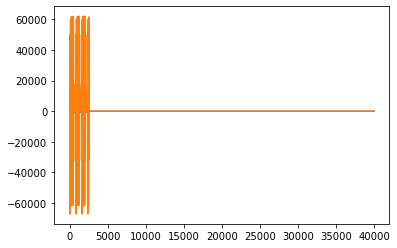

In [12]:
import matplotlib.pyplot as mp
buffer_size =  2000 * 10 * 2 * 4 
mp.plot(main.data_processing.output_buffer_0[0:buffer_size//2:2])
mp.plot(main.data_processing.output_buffer_0[1:buffer_size//2:2])

In [3]:
import src.pmod as pmod

AttributeError: Could not find IP or hierarchy fpga_pmod_da4_a1_0 in overlay

In [ ]:
channels = [x for x in range(8)]  # [Y,X,2XY,X2Y2,Z2,Z,YZ,XZ]
# ------------------------------------------------
initial_values = [142, 1443, 1260, 136, 63, 263, 439, 748] #[433, 1426, 1381, 261, 124,145,796,225] # [311, 1444, 1381, 261, 124, 145, 796, 225]  #[120, 1507, 1238, 587, 171, 370, 1164, 118]  # @ [37, 1506, 1198, 587, 171, 370, 1164, 118] 18hz
for i, value in enumerate(initial_values): pmod.da4_set(channels[i], value)
#7640000

In [10]:
pmod.da4_reset()
pmod.da4_init()

In [100]:
# import src.pmod as pmod
pmod.da4_setall(0)